In [2]:
#Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
def GD(objective, gradient, initialPoint, stepsize, noiseLevel, maxIter, desiredObj, 
       seed = None,
       verbose = True):
    '''
    Perform stochastic gradient descent to maximize objective.
    
    Args:
    objective    - function handle, return objective
    gradient     - function handle, return gradient
    initialPoint - array of dimension d, starting point
    stepsize     - numeric, 
    noiseLevel   - numeric, the variance of the Gaussian noise
    maxIter      - integer, the iterations
    desiredObj   - double, the desired objective function value (algorithm halts when it is reached)
    verbose      - boolean, whether to print intermediate results
    
    Returns:
    trajectory   - 2d array of maxIter * d, the record of x
    image        - 2d array of maxIter * 1, the record of objective
    haltIter     - integer, the stopped iteration
    '''
    if isinstance(initialPoint, float):
        d = 1
    else:
        d = len(initialPoint)
    rng = random.Random()
    if seed is not None:
        rng.seed(seed)
    trajectory = np.zeros((maxIter, d))
    image      = np.zeros((maxIter, 1))
    x          = initialPoint
    trajectory[0] = x
    image[0]      = objective(x)
    for iter in range(1, maxIter):
        noise = rng.normalvariate(0, noiseLevel)
        x = x + stepsize * gradient(x) + noise
        trajectory[iter] = x
        image[iter] = objective(x)
        if image[iter] > desiredObj:
            if verbose:
                print('Reached desired Objective at step %d' % iter)
            break
    if verbose and image[iter] < desiredObj:
        print('Did not converge while max iteration reached %d' % iter)
    haltIter = iter
    return trajectory, image, haltIter

Did not converge while max iteration reached 9999999


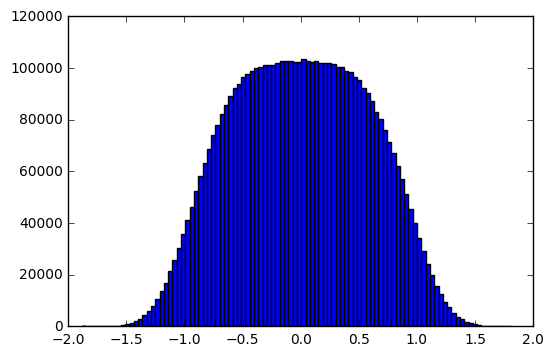

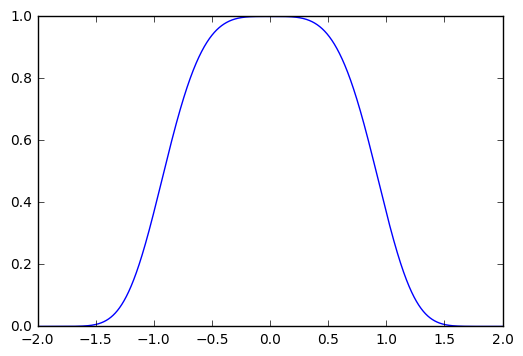

In [9]:
def ProofOfConcept():
    '''
    Show SGD's stationary point can indeed approximate the objective function
    
    '''
    degree = 4
    def func(x):
        return -np.power(x, degree)
    def grad(x):
        return -degree * np.power(x, degree - 1)
    trajectory, image, haltIter = GD(func, grad, initialPoint=1., stepsize=1e-2/2, 
                                     noiseLevel=1e-1, maxIter=int(1e7), desiredObj=100)
    #plt.figure()
    #plt.plot(trajectory[0:haltIter], image[0:haltIter])
    plt.figure()
    plt.hist(trajectory[haltIter/2:haltIter], 100)
    plt.figure()
    x = np.arange(-2, 2, 1e-3)
    plt.plot(x, np.exp(func(x)))

ProofOfConcept()

Did not converge while max iteration reached 9999999


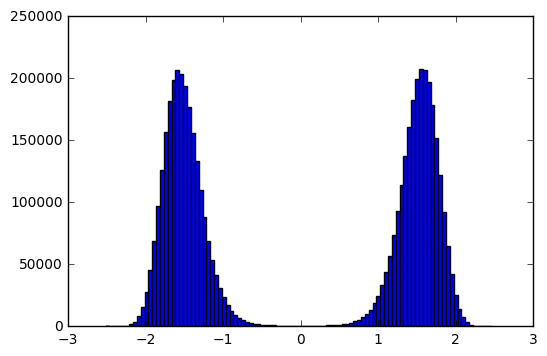

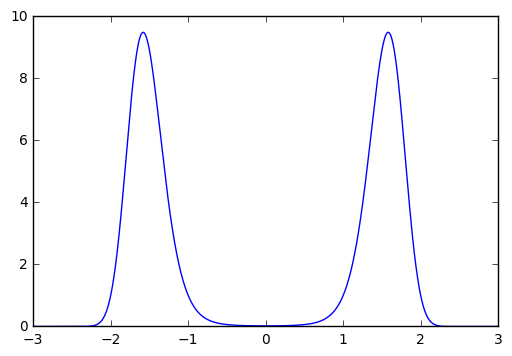

In [8]:
def ProofOfConcept2():
    '''
    Show SGD's stationary point can indeed approximate the objective function
    
    '''
    c = 1
    def func(x):
        return -(x ** 2 - 4)*(x ** 2 - 1) * c
    def grad(x):
        return (-4 * x ** 3 + 10 * x) * c
    trajectory, image, haltIter = GD(func, grad, initialPoint=1., stepsize=1e-2/2, 
                                     noiseLevel=1e-1, maxIter=int(1e7), desiredObj=100)
    #plt.figure()
    #plt.plot(trajectory[0:haltIter], image[0:haltIter])
    plt.figure()
    plt.hist(trajectory[haltIter/2:haltIter], 100)
    plt.figure()
    x = np.arange(-3, 3, 1e-3)
    plt.plot(x, np.exp(func(x)))

ProofOfConcept2()

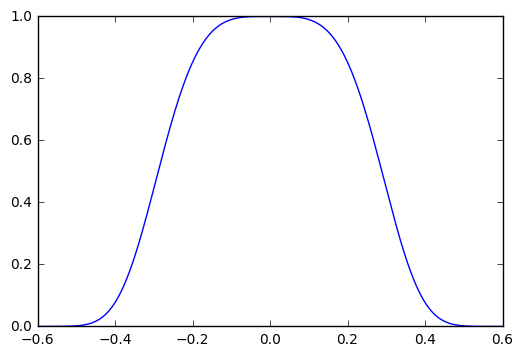

In [24]:
x = np.arange(-.6, .6, 1e-3)
plt.plot(x, np.exp(-100*x**4))

Reached desired Objective at step 9903


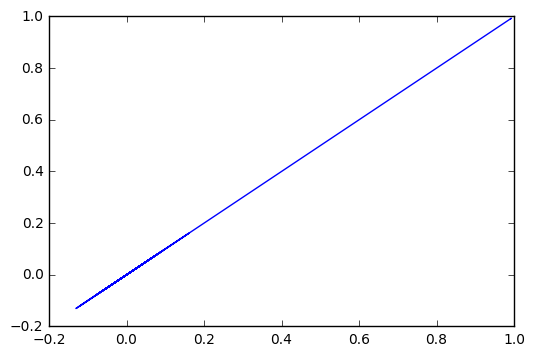

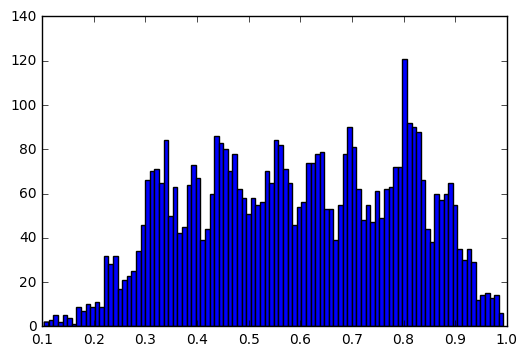

In [185]:
def GD_UnitTest(order = 1):
    '''
    Unit test for GD for polynomial functions
    '''
    def func(x):
        return np.power(x, order)
    def grad(x):
        return order * np.power(abs(x), order - 1)
    trajectory, image, haltIter = GD(func, grad, initialPoint=1e-3, stepsize=1e-4/2, 
                                     noiseLevel=1e-2, maxIter=int(1e6), desiredObj=1)
    plt.figure()
    plt.plot(trajectory[0:haltIter], image[0:haltIter])
    plt.figure()
    plt.hist(trajectory[haltIter/2:haltIter], 100)

GD_UnitTest(order = 1)